<a href="https://colab.research.google.com/github/shila121/projects/blob/main/creditRisk_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
df = pd.read_csv("df.csv")
df.head()

,id,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648,-2120,0,2,10
1,100031,1,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628,-6573,-1827,0,3,9
2,100032,0,1,112500.0,327024.0,23827.5,270000.0,0.019101,-15948,-1234,-5782,-3153,0,2,10
3,100044,0,0,121500.0,454500.0,15151.5,454500.0,0.030755,-21077,-1288,-5474,-4270,0,2,10
4,100045,0,0,99000.0,247275.0,17338.5,225000.0,0.006207,-23920,365243,-9817,-4969,0,2,11


In [3]:
df.columns

Index(['id', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          20000 non-null  int64  
 1   TARGET                      20000 non-null  int64  
 2   CNT_CHILDREN                20000 non-null  int64  
 3   AMT_INCOME_TOTAL            20000 non-null  float64
 4   AMT_CREDIT                  20000 non-null  float64
 5   AMT_ANNUITY                 20000 non-null  float64
 6   AMT_GOODS_PRICE             19986 non-null  float64
 7   REGION_POPULATION_RELATIVE  20000 non-null  float64
 8   DAYS_BIRTH                  20000 non-null  int64  
 9   DAYS_EMPLOYED               20000 non-null  int64  
 10  DAYS_REGISTRATION           20000 non-null  int64  
 11  DAYS_ID_PUBLISH             20000 non-null  int64  
 12  FLAG_WORK_PHONE             20000 non-null  int64  
 13  REGION_RATING_CLIENT        200

In [5]:
df.describe()

,id,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
count,20000.000000,20000.00000,20000.000000,2.000000e+04,2.000000e+04,20000.000000,1.998600e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,132438.434700,0.17895,0.433550,1.735475e+05,5.945596e+05,27050.755725,5.325604e+05,0.020588,-15877.603300,59562.859600,-4934.438900,-2974.468200,0.202100,2.069750,12.012650
std,15569.601245,0.38332,0.737843,8.319024e+05,3.976243e+05,14530.344084,3.649684e+05,0.013573,4344.318087,137575.974767,3501.209694,1511.557584,0.401576,0.509115,3.267832
min,100002.000000,0.00000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25166.000000,-17531.000000,-21249.000000,-6226.000000,0.000000,1.000000,0.000000
25%,119591.750000,0.00000,0.000000,1.125000e+05,2.700000e+05,16654.500000,2.385000e+05,0.010006,-19422.250000,-2744.000000,-7418.500000,-4285.000000,0.000000,2.000000,10.000000
50%,138676.500000,0.00000,0.000000,1.440000e+05,5.122418e+05,24930.000000,4.500000e+05,0.018850,-15534.000000,-1200.500000,-4458.000000,-3215.500000,0.000000,2.000000,12.000000
75%,145617.250000,0.00000,1.000000,2.025000e+05,8.086500e+05,34404.750000,6.795000e+05,0.028663,-12249.750000,-322.000000,-1954.000000,-1690.750000,0.000000,2.000000,14.000000
max,151428.000000,1.00000,11.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7683.000000,365243.000000,0.000000,0.000000,1.000000,3.000000,23.000000


In [7]:
df['TARGET'].value_counts()

0    16421
1     3579
Name: TARGET, dtype: int64

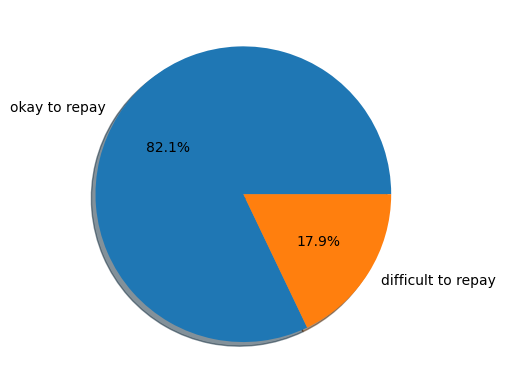

In [8]:
plt.pie(df['TARGET'].value_counts(), labels=['okay to repay', 'difficult to repay'], shadow=True, autopct='%1.1f%%')
plt.axis('off')
plt.show()

In [9]:
df['CNT_CHILDREN'].value_counts()

0     13795
1      4118
2      1781
3       263
4        29
5         8
6         3
8         1
9         1
11        1
Name: CNT_CHILDREN, dtype: int64

In [10]:
child_count = df['CNT_CHILDREN'].value_counts()
for child, count in child_count.items():
    print(f"Number of individuals that have {child} children is: {count}")

Number of individuals that have 0 children is: 13795
Number of individuals that have 1 children is: 4118
Number of individuals that have 2 children is: 1781
Number of individuals that have 3 children is: 263
Number of individuals that have 4 children is: 29
Number of individuals that have 5 children is: 8
Number of individuals that have 6 children is: 3
Number of individuals that have 8 children is: 1
Number of individuals that have 9 children is: 1
Number of individuals that have 11 children is: 1


In [11]:
# Outlier Detection using Interquartile Range (IQR)?


df[["AMT_INCOME_TOTAL"]].describe().applymap(lambda x: f"{x:,.3f}")

,AMT_INCOME_TOTAL
count,"20,000.000"
mean,"173,547.463"
std,"831,902.381"
min,"25,650.000"
25%,"112,500.000"
50%,"144,000.000"
75%,"202,500.000"
max,"117,000,000.000"


In [12]:
Q1 = df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = df['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['AMT_INCOME_TOTAL'] < lower_bound) | (df['AMT_INCOME_TOTAL'] > upper_bound)]

print("Outlier Detection Bounds:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
df = df.drop(outliers.index)
df.describe()

Outlier Detection Bounds:
Lower bound: -22500.0
Upper bound: 337500.0


,id,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
count,19113.000000,19113.000000,19113.000000,19113.000000,1.911300e+04,19113.000000,1.910000e+04,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000,19113.000000
mean,132443.026788,0.180348,0.431434,153823.644432,5.765888e+05,26252.145817,5.154887e+05,0.020184,-15887.445247,61309.828912,-4961.227803,-2975.074347,0.201852,2.083346,11.978810
std,15571.370327,0.384487,0.735982,64089.269876,3.804076e+05,13383.513788,3.474506e+05,0.012970,4378.959452,139092.622959,3507.266884,1510.921862,0.401393,0.499069,3.262019
min,100002.000000,0.000000,0.000000,25650.000000,4.500000e+04,2052.000000,4.500000e+04,0.000533,-25166.000000,-17531.000000,-21249.000000,-6226.000000,0.000000,1.000000,1.000000
25%,119599.000000,0.000000,0.000000,112500.000000,2.700000e+05,16434.000000,2.295000e+05,0.010006,-19489.000000,-2702.000000,-7457.000000,-4287.000000,0.000000,2.000000,10.000000
50%,138676.000000,0.000000,0.000000,135000.000000,4.992615e+05,24457.500000,4.500000e+05,0.018850,-15538.000000,-1175.000000,-4482.000000,-3213.000000,0.000000,2.000000,12.000000
75%,145620.000000,0.000000,1.000000,198000.000000,7.852500e+05,33025.500000,6.750000e+05,0.026392,-12218.000000,-299.000000,-1978.000000,-1690.000000,0.000000,2.000000,14.000000
max,151428.000000,1.000000,11.000000,337500.000000,2.961000e+06,173574.000000,2.961000e+06,0.072508,-7683.000000,365243.000000,0.000000,0.000000,1.000000,3.000000,23.000000


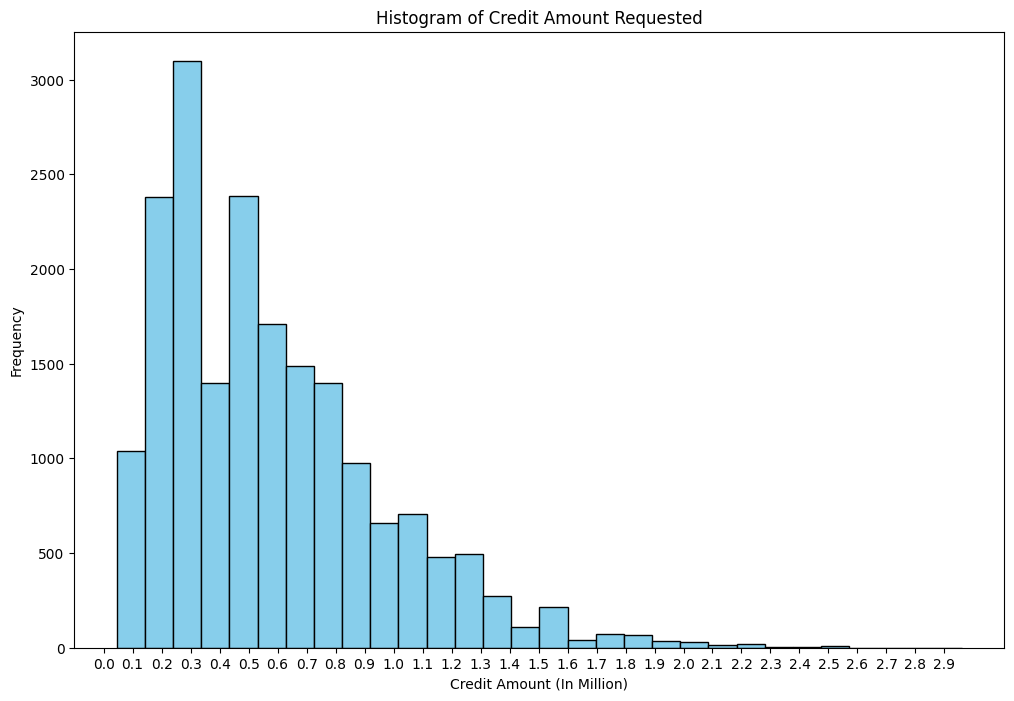

In [13]:
plt.figure(figsize=(12,8))
plt.hist(df['AMT_CREDIT'] / 1000000, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Credit Amount Requested')
plt.xlabel('Credit Amount (In Million)')
plt.ylabel('Frequency')
tick_values = [i / 10 for i in range(int(10 * min(df['AMT_CREDIT'] / 1000000)), int(10 * max(df['AMT_CREDIT'] / 1000000)) + 1)]
plt.xticks(tick_values)
plt.show()

In [14]:
df = df.dropna()
df.shape

(19100, 15)

In [15]:
X = df.drop(columns=['TARGET', 'id'])
y = df['TARGET']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [17]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Logistic Regression?


lr_model = LogisticRegression()

lr_model.fit(X_train_scaled, y_train)

accuracy = lr_model.score(X_test_scaled, y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8235602094240838


In [19]:
# Random Forest



rf_model = RandomForestClassifier()

rf_model.fit(X_train_scaled, y_train)

accuracy = rf_model.score(X_test_scaled, y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8230366492146597


In [20]:
# Support Vector Machine


svm_model = SVC()

svm_model.fit(X_train_scaled, y_train)

accuracy = svm_model.score(X_test_scaled, y_test)
print(f"Accuracy on the test set: {accuracy}")

Accuracy on the test set: 0.8240837696335078


In [21]:
# Neural Network


# Build a simple neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Epoch 1/50
478/478 [==============================] - 4s 5ms/step - loss: 0.5084 - accuracy: 0.8030 - val_loss: 0.4608 - val_accuracy: 0.8241
Epoch 2/50
478/478 [==============================] - 2s 4ms/step - loss: 0.4823 - accuracy: 0.8185 - val_loss: 0.4595 - val_accuracy: 0.8241
Epoch 3/50
478/478 [==============================] - 1s 3ms/step - loss: 0.4770 - accuracy: 0.8185 - val_loss: 0.4572 - val_accuracy: 0.8241
Epoch 4/50
478/478 [==============================] - 1s 3ms/step - loss: 0.4729 - accuracy: 0.8185 - val_loss: 0.4576 - val_accuracy: 0.8241
Epoch 5/50
478/478 [==============================] - 1s 3ms/step - loss: 0.4698 - accuracy: 0.8185 - val_loss: 0.4559 - val_accuracy: 0.8241
Epoch 6/50
478/478 [==============================] - 1s 3ms/step - loss: 0.4677 - accuracy: 0.8185 - val_loss: 0.4550 - val_accuracy: 0.8241
Epoch 7/50
478/478 [==============================] - 1s 3ms/step - loss: 0.4641 - accuracy: 0.8185 - val_loss: 0.4568 - val_accuracy: 0.8241
Epoch 

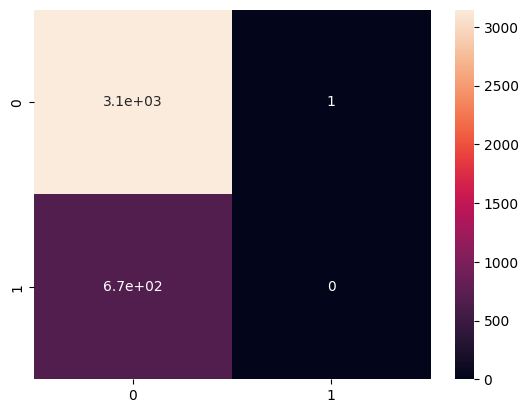

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)
plt.show()

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
# import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

# Importing our data
df = pd.read_csv("german_credit_data.csv",index_col=0)

original_df = df.copy()

In [26]:
original_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [27]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [28]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [29]:
df.isnull().sum().sort_values(ascending =  True)

Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
Saving accounts     183
Checking account    394
dtype: int64

In [32]:
df.head()
df = df.rename(columns={"Credit amount": "Credit_amount"})

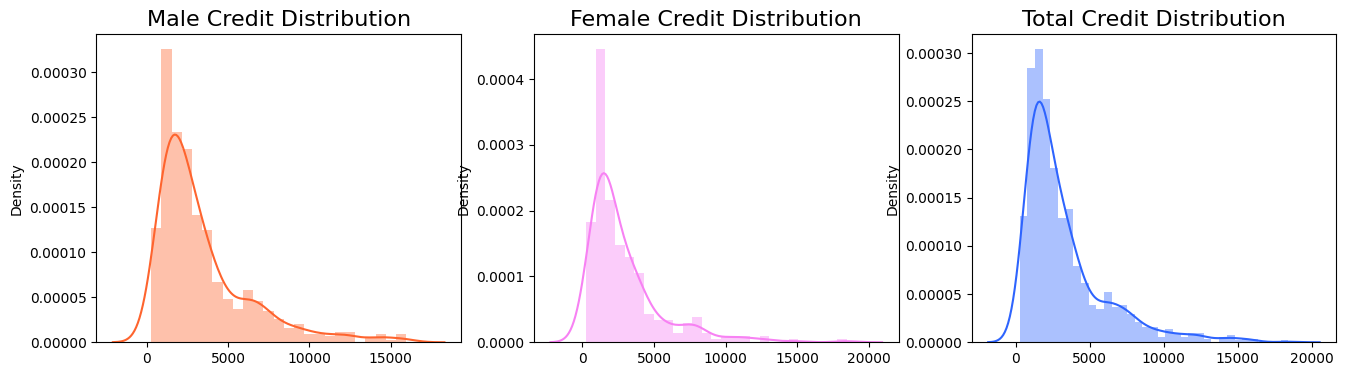

In [33]:
# Distribution of Credit_Amount for each Gender
male_credit = df["Credit_amount"].loc[df["Sex"] == "male"].values
female_credit = df["Credit_amount"].loc[df["Sex"] == "female"].values
total_credit = df['Credit_amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

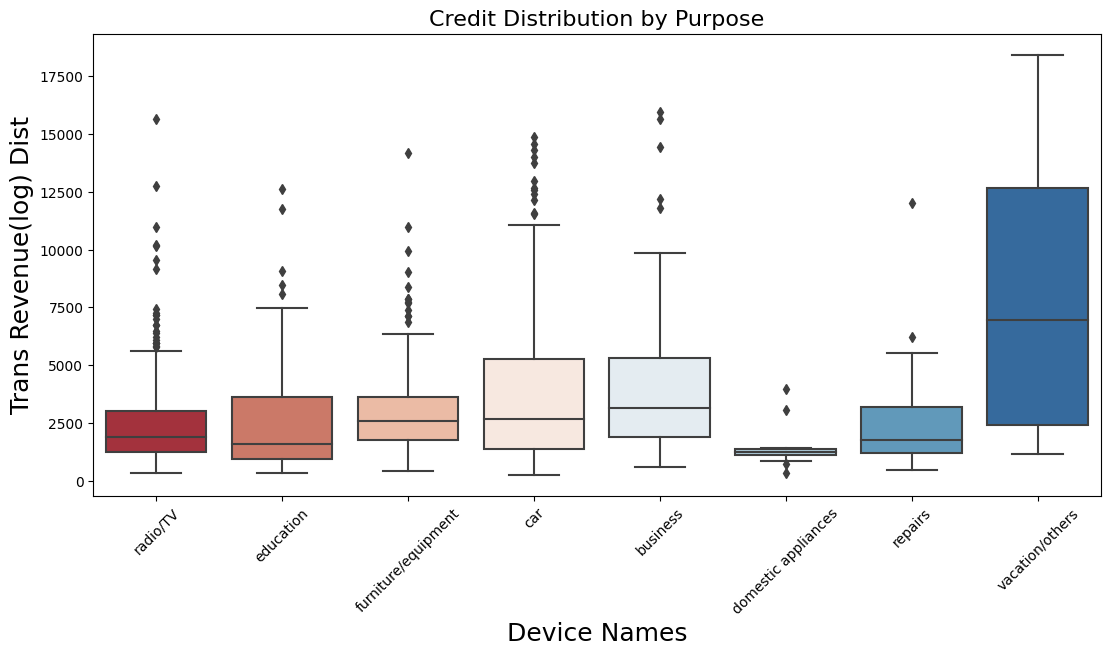

In [34]:
import seaborn as sns

plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='Purpose', y='Credit_amount',
                   data=df, palette="RdBu")


g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Device Names', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18)
plt.show()

In [35]:
# We have 2x more German males applying for Credit Loans than Females.
df["Sex"].value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [37]:
from plotly import tools
# import plotly.plotly as py
import plotly.graph_objs as go

by_age = df['Age'].values.tolist()
male_age = df['Age'].loc[df['Sex'] == 'male'].values.tolist()
female_age = df['Age'].loc[df['Sex'] == 'female'].values.tolist()

trace0 = go.Histogram(
    x=male_age,
    histnorm='probability',
    name="German Male",
    marker = dict(
        color = 'rgba(100, 149, 237, 0.6)',
    )
)
trace1 = go.Histogram(
    x=female_age,
    histnorm='probability',
    name="German Female",
    marker = dict(
        color = 'rgba(255, 182, 193, 0.6)',
    )
)
trace2 = go.Histogram(
    x=by_age,
    histnorm='probability',
    name="Overall Gender",
     marker = dict(
        color = 'rgba(169, 169, 169, 0.6)',
    )
)
fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Males','Female', 'All Genders'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Distribution of Gender', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [38]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.
df["Purpose"].unique()
sex_purpose = pd.crosstab(df['Purpose'], df['Sex']).apply(lambda x: x/x.sum() * 100)
sex_purpose

Sex,female,male
Purpose,,
business,6.129032,11.304348
car,30.322581,35.217391
domestic appliances,1.935484,0.869565
education,7.741935,5.072464
furniture/equipment,23.870968,15.507246
radio/TV,27.419355,28.260870
repairs,1.612903,2.463768
vacation/others,0.967742,1.304348


In [39]:
# Values into list
m_purpose = sex_purpose['male'].values.tolist()
f_purpose = sex_purpose['female'].values.tolist()

# Round values
male_purpose = ['%.2f' % elem for elem in m_purpose]
female_purpose = ['%.2f' % elem for elem in f_purpose]

male = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=male_purpose,
    name='German Males',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(72, 92, 238, 0.6)',
        line = dict(
            color = 'rgba(72, 92, 238, 1.0)',
            width = 3)
    )
)
female = go.Bar(
    y=['business', 'car', 'domestic appliances', 'education', 'furniture/equipment',
      'radio/TV', 'repairs', 'vacation/others'],
    x=female_purpose,
    name='German Females',
    text='(%)',
    orientation = 'h',
    marker = dict(
        color = 'rgba(217, 128, 234, 0.6)',
        line = dict(
            color = 'rgba(217, 128, 234, 1.0)',
            width = 3)
    )
)

data = [male, female]
layout = dict(
    title='Application Reasons for a Loan by Gender',
     xaxis=dict(
        title='(% of Gender)',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    yaxis=dict(
        title='Purpose for the Loan',
        titlefont=dict(
            family='Arial, sans-serif',
            size=11,
            color='black'
        ),
        showticklabels=True,
        tickangle=40,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=10,
            color='black'
        ),
        exponentformat='e',
        showexponent='all'
    ),
    barmode='stack'
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='marker-h-bar')

In [40]:
# Percent distribution of Gender (how many jobs does each gender have in %)
number_of_jobs = pd.crosstab(df["Job"], df["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


In [41]:
# Ok we have to create for each group risky and non-risky loans.
df['Age_Group'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['Age'] > 18) & (col['Age'] <= 29), 'Age_Group'] = 'Young'
    col.loc[(col['Age'] > 29) & (col['Age'] <= 40), 'Age_Group'] = 'Young Adults'
    col.loc[(col['Age'] > 40) & (col['Age'] <= 55), 'Age_Group'] = 'Senior'
    col.loc[col['Age'] > 55, 'Age_Group'] = 'Elder'

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior


In [42]:
# Take credit amount values into a list
young = df['Credit_amount'].loc[df['Age_Group'] == 'Young'].values.tolist()
young_adults = df['Credit_amount'].loc[df['Age_Group'] == 'Young Adults'].values.tolist()
senior = df['Credit_amount'].loc[df['Age_Group'] == 'Senior'].values.tolist()
elder_credit = df['Credit_amount'].loc[df['Age_Group'] == 'Elder'].values.tolist()

# Create the box plots by age category
young_credit = go.Box(
    y = young,
    name = "Young",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(150, 198, 109)'),
    line = dict(
        color = 'rgb(111, 200, 37)')
)

young_adults_credit = go.Box(
    y = young_adults,
    name = "Young Adults",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(124, 236, 212)'),
    line = dict(
        color = 'rgb(38, 214, 177)')
)

senior_credit = go.Box(
    y = senior,
    name = "Seniors",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(241, 93, 93)'),
    line = dict(
        color = 'rgb(225, 44, 44)')
)

elder_credit = go.Box(
    y = elder_credit,
    name = "Elders",
    jitter = 0.3,
    pointpos = -1.8,
    boxpoints = 'all',
    marker = dict(
        color = 'rgb(180, 121, 72)'),
    line = dict(
        color = 'rgb(115, 77, 46)')
)

data = [young_credit, young_adults_credit, senior_credit, elder_credit]

layout = dict(
    title="Credit Amount by Age Group Segment",
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)
iplot(fig, filename="Box Plot")

In [43]:
good_credit_df = df.loc[df['Risk'] == "good"]
bad_credit_df = df.loc[df['Risk'] == "bad"]

good_credit_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
5,35,male,1,free,NaN,NaN,9055,36,education,good,Young Adults
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good,Senior


In [44]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": good_credit_df['Age_Group'],
            "y": good_credit_df['Credit_amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(34, 178, 178)'
            }
        },
        {
            "type": 'violin',
            "x": bad_credit_df['Age_Group'],
            "y": bad_credit_df['Credit_amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'rgb(178, 34, 34)'
            }
        }
    ],
    "layout" : {
        "title": "Distribution of Credit Borrowed by Age Group",
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


iplot(fig, filename = 'Age-Housing', validate=False)

In [45]:
# Lets find loans by age group and by the level of risk and plot them in a bar chart.

# Age Group Segments
young_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'good')].sum()
young_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young') & (df['Risk'] == 'bad')].sum()
young_adult_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'good')].sum()
young_adult_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Young Adults') & (df['Risk'] == 'bad')].sum()
senior_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'good')].sum()
senior_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Senior') & (df['Risk'] == 'bad')].sum()
elder_good = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'good')].sum()
elder_bad = df['Credit_amount'].loc[(df['Age_Group'] == 'Elder') & (df['Risk'] == 'bad')].sum()

# Percents
young_good_p = young_good/(young_good + young_bad) * 100
young_bad_p = young_bad/(young_good + young_bad) * 100
young_adult_good_p = young_adult_good/(young_adult_good + young_adult_bad) * 100
young_adult_bad_p = young_adult_bad/(young_adult_good + young_adult_bad) * 100
senior_good_p = senior_good/(senior_good + senior_bad) * 100
senior_bad_p =  senior_bad/(senior_good + senior_bad) * 100
elder_good_p = elder_good/(elder_good + elder_bad) * 100
elder_bad_p = elder_bad/(elder_good + elder_bad) * 100

# Round Percents
young_good_p = str(round(young_good_p, 2))
young_bad_p = str(round(young_bad_p, 2))
young_adult_good_p = str(round(young_adult_good_p, 2))
young_adult_bad_p = str(round(young_adult_bad_p, 2))
senior_good_p = str(round(senior_good_p, 2))
senior_bad_p = str(round(senior_bad_p, 2))
elder_good_p = str(round(elder_good_p, 2))
elder_bad_p = str(round(elder_bad_p, 2))



x = ["Young", "Young Adults", "Senior", "Elder"]

good_loans = go.Bar(
    x=x,
    y=[young_good, young_adult_good, senior_good, elder_good],
    name="Good Loans",
    text=[young_good_p + '%', young_adult_good_p + '%', senior_good_p + '%', elder_good_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(111, 235, 146)',
        line=dict(
            color='rgb(60, 199, 100)',
            width=1.5),
        ),
    opacity=0.6
)

bad_loans =  go.Bar(
    x=x,
    y=[young_bad, young_adult_bad, senior_bad, elder_bad],
    name="Bad Loans",
    text=[young_bad_p + '%', young_adult_bad_p + '%', senior_bad_p + '%', elder_bad_p + '%'],
    textposition = 'auto',
    marker=dict(
        color='rgb(247, 98, 98)',
        line=dict(
            color='rgb(225, 56, 56)',
            width=1.5),
        ),
    opacity=0.6
)

data = [good_loans, bad_loans]

layout = dict(
    title="Type of Loan by Age Group",
    xaxis = dict(title="Age Group"),
    yaxis= dict(title="Credit Amount")
)

fig = dict(data=data, layout=layout)

iplot(fig, filename='grouped-bar-direct-labels')

In [46]:
# We have some missing value so we will just ignore the missing values in this analysis.
df["Checking account"].unique()
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit_amount', 'Duration', 'Purpose', 'Risk', 'Age_Group'],
      dtype='object')

In [47]:
cross_checking = pd.crosstab(df['Risk'], df['Checking account']).apply(lambda x: x/x.sum() * 100)
decimals = pd.Series([2,2,2], index=['little', 'moderate', 'rich'])

cross_checking = cross_checking.round(decimals)
cross_checking

Checking account,little,moderate,rich
Risk,,,
bad,49.27,39.03,22.22
good,50.73,60.97,77.78


In [49]:
# import plotly.plotly as py
import plotly.graph_objs as go


bad_little = cross_checking['little'][0]
good_little = cross_checking['little'][1]
bad_moderate = cross_checking['moderate'][0]
good_moderate = cross_checking['moderate'][1]
bad_rich = cross_checking['rich'][0]
good_rich = cross_checking['rich'][1]

little = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_little, good_little],
    name="Little Wealth",
    text='%',
     marker=dict(
        color='#FF5050',
         line=dict(
            color='#E13232',
            width=1.5),
    ),
)

moderate = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_moderate, good_moderate],
    name="Moderate Wealth",
    text='%',
    xaxis='x2',
    yaxis='y2',
    marker=dict(
        color='#FFB232',
         line=dict(
            color='#CD8000',
            width=1.5),
    ),
)
rich = go.Bar(
    x=['Bad Risk', 'Good Risk'],
    y=[bad_rich, good_rich],
    name="Rich Wealth",
    text="%",
    marker=dict(
        color='#8DFF83',
         line=dict(
            color='#3DAF33',
            width=1.5),
    ),
    xaxis='x3',
    yaxis='y3'
)

data=[little, moderate, rich]

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=('Little Wealth', 'Moderate Wealth', 'Rich Wealth'))

fig.append_trace(little, 1, 1)
fig.append_trace(moderate, 1, 2)
fig.append_trace(rich, 1, 3)

fig['layout'].update(height=400, width=800, title='Levels of Risk' +
                                                  ' by Wealth')


iplot(fig, filename='make-subplots-multiple-with-titles')

In [50]:
df['Risk_int'] = np.nan
lst = [df]

for col in lst:
    col.loc[df['Risk'] == 'bad', 'Risk_int'] = 0
    col.loc[df['Risk'] == 'good', 'Risk_int'] = 1


df['Risk_int'] = df['Risk_int'].astype(int)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit_amount,Duration,Purpose,Risk,Age_Group,Risk_int
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,0
2,49,male,1,own,little,NaN,2096,12,education,good,Senior,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior,1
4,53,male,2,free,little,little,4870,24,car,bad,Senior,0


In [51]:
# import plotly.plotly as py
import plotly.figure_factory as ff


corr = df.corr()

arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
iplot(fig, filename='annotated_heatmap')

In [57]:
# import plotly.plotly as py
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

numeric_vals = df.select_dtypes(exclude=['object'])


risks = df['Risk'].values.tolist()

colormap = ['#b22222', '#4169e1']



In [58]:
bad_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'bad'].values.tolist()
good_credit_amount = df["Credit_amount"].loc[df['Risk'] == 'good'].values.tolist()
bad_duration = df['Duration'].loc[df['Risk'] == 'bad'].values.tolist()
good_duration = df['Duration'].loc[df['Risk'] == 'good'].values.tolist()


bad_loans = go.Scatter(
    x = bad_duration,
    y = bad_credit_amount,
    name = 'Bad Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

good_loans = go.Scatter(
    x = good_duration,
    y = good_credit_amount,
    name = 'Good Loans',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(34, 139, 34, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [bad_loans, good_loans]

layout = dict(title = 'Correlation of Risk with <br> Credit Amount Borrowed',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False)
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

In [59]:
df['Purpose'].unique()

cross_purpose = pd.crosstab(df['Purpose'], df['Risk']).apply(lambda x: x/x.sum() * 100)
cross_purpose = cross_purpose.round(decimals=2)
cross_purpose.sort_values(by=['bad'])

Risk,bad,good
Purpose,,
domestic appliances,1.33,1.14
vacation/others,1.67,1.00
repairs,2.67,2.00
education,7.67,5.14
business,11.33,9.00
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
car,35.33,33.00


In [60]:
# This will be x
purposes = df['Purpose'].unique().tolist()
purposes = sorted(purposes)

good_purposes = cross_purpose["good"].values.tolist()
bad_purposes = cross_purpose["bad"].values.tolist()




good = go.Bar(
    x=purposes,
    y=good_purposes,
    name='Good Risk',
    text='%',
    marker=dict(
        color='rgb(123, 255, 255)',
        line=dict(
            color='rgb(0, 213, 213)',
            width=1.5
        )
    ),
)
bad = go.Bar(
    x=purposes,
    y=bad_purposes,
    name='Bad Risk',
    text = '%',
    marker=dict(
        color='rgb(255, 123, 123)',
        line=dict(
            color='rgb(213, 0, 0)',
            width=1.5
        )
    ),
)
data = [good, bad]
layout = go.Layout(
    title='Which Purpose Carried the Highest Risk?',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Percentage(%)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='style-bar')

In [61]:
cross_credit = df.groupby(['Risk', 'Purpose'], as_index=False).Credit_amount.sum()

good_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "good"].values.tolist()
bad_amnt = cross_credit["Credit_amount"].loc[cross_credit["Risk"] == "bad"].values.tolist()

good_risk = {"x": good_amnt,
          "y": purposes,
          "marker": {"color": "rgb(28, 98, 98)", "size": 12},
          "mode": "markers",
          "name": "Good Risk",
          "type": "scatter"
}

bad_risk = {"x": bad_amnt,
          "y": purposes,
          "marker": {"color": "rgb(98, 28, 28)", "size": 12},
          "mode": "markers",
          "name": "Bad Risk",
          "type": "scatter",
}

data = [good_risk, bad_risk]
layout = {"title": "Credit Loan Applications by Purpose",
          "xaxis": {"title": "Credit Amount Borrowed", },
          "yaxis": {"title": ""},
         "width": 800,
         "height": 700}

fig = dict(data=data, layout=layout)
iplot(fig, filename='basic_dot-plot')

In [62]:
# Check missing values in our dataframe
original_df.isnull().sum().sort_values(ascending=False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [63]:
original_df.drop(['Checking account', 'Saving accounts'], axis=1, inplace=True)

In [64]:
original_df.isnull().sum().sort_values(ascending=False)

Age              0
Sex              0
Job              0
Housing          0
Credit amount    0
Duration         0
Purpose          0
Risk             0
dtype: int64

In [65]:
# Feature Engineering (We cannot delete the missing values because we have too litle information)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit

original_df["Risk"].value_counts() # 70% is good risk and 30% is bad risk.

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train, test in stratified.split(original_df, original_df["Risk"]):
    strat_train = original_df.loc[train]
    strat_test = original_df.loc[test]


# The main purpose of this code is to have an approximate ratio
# of 70% good risk and 30% bad risk in both training and testing sets.
strat_train["Risk"].value_counts() / len(df)
strat_test["Risk"].value_counts() / len(df)

good    0.14
bad     0.06
Name: Risk, dtype: float64

In [66]:
# Have our new train and test data
train = strat_train
test = strat_test


# Our features
X_train = train.drop('Risk', axis=1)
X_test = test.drop('Risk', axis=1)

# Our Labels we will use them later
y_train = train["Risk"]
y_test = test["Risk"]

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [68]:
from sklearn.base import BaseEstimator, TransformerMixin
# Create a class to select numerical or cateogrical columns.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit (self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [69]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

numeric_train_df = X_train.select_dtypes(exclude=['object'])
numeric_test_df = X_test.select_dtypes(exclude=['object'])

categorical_train_df = X_train.select_dtypes(['object'])
categorical_test_df = X_test.select_dtypes(['object'])

numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numeric_train_df.columns.values.tolist())),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('select_categoric', DataFrameSelector(categorical_train_df.columns.values.tolist())),
    ('encoding', CategoricalEncoder(encoding='onehot-dense'))
])

# Combine both pipelines
main_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numerical_pipeline),
    ('cat_pipeline', categorical_pipeline)
])

X_train_scaled = main_pipeline.fit_transform(X_train)
X_test_scaled = main_pipeline.fit_transform(X_test)

In [70]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train_scaled = encode.fit_transform(y_train)
y_test_scaled = encode.fit_transform(y_test)

In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Implement gridsearchcv to see which are our best p

params = {'C': [0.75, 0.85, 0.95, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 4, 5]}

svc_clf = SVC(random_state=42)

grid_search_cv = GridSearchCV(svc_clf, params)
grid_search_cv.fit(X_train_scaled, y_train_scaled)

GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [72]:
grid_search_cv.best_estimator_

SVC(C=0.95, random_state=42)

In [73]:
grid_search_cv.best_params_

{'C': 0.95, 'degree': 3, 'kernel': 'rbf'}

In [74]:
svc_clf = grid_search_cv.best_estimator_
svc_clf.fit(X_train_scaled, y_train_scaled)

SVC(C=0.95, random_state=42)

In [75]:
svc_clf.score(X_train_scaled, y_train_scaled)

0.76

In [76]:
  from sklearn.model_selection import cross_val_score

# Let's make sure the data is not overfitting
svc_clf = SVC(kernel='rbf', C=1, random_state=42)
scores = cross_val_score(svc_clf, X_train_scaled, y_train_scaled)
scores.mean()

0.71625

In [77]:
from sklearn.metrics import accuracy_score

svc_clf.fit(X_train_scaled, y_train_scaled)
y_pred = svc_clf.predict(X_test_scaled)

# Accuracy score 71%
accuracy_score(y_test_scaled, y_pred)

0.7